In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from keras.applications import VGG16,InceptionV3,ResNet50
from keras.optimizers import Adam

In [2]:
train_dir = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\Machine Vision\Senminar\Week5 Seminar\MV_Seminar Week 5\data_mv\train'
test_dir = r'C:\Users\MSI-PC\Desktop\Level 6 curriculum\Machine Vision\Senminar\Week5 Seminar\MV_Seminar Week 5\data_mv\test'

train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)



In [3]:

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size = 4
)

# validation_gen = train.flow_from_directory(
#     train_dir,
#     target_size = (128, 128),
#     batch_size = 4
#     validation_split = 0.1
# )

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size = (128, 128),
    batch_size = 4,
    
)

Found 48 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [4]:
x_train, y_train = train_gen.next()
x_test, y_test =test_gen.next()

In [5]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

In [6]:
#Adding Customized Layer
x = Flatten()(base_model.output)
x = Dense(64, activation = 'relu')(x)
output_layer = Dense(3, activation = 'softmax')(x)

In [7]:
model = Model(inputs = base_model.input, outputs = output_layer)

In [8]:
# Prevent the weights from being updated by freezing the base layers
for layer in base_model.layers:
    layer.trainable = False

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [10]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 1.0822 - accuracy: 0.3333 - val_loss: 1.2997 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 40ms/step - loss: 0.1507 - accuracy: 1.0000 - val_loss: 0.4695 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 40ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.1872 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 40ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0895 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 40ms/step - loss: 8.2096e-04 - accuracy: 1.0000 - val_loss: 0.0473 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 40ms/step - loss: 3.4199e-04 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 40ms/step - loss: 1.6873e-04 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 8/10
1/

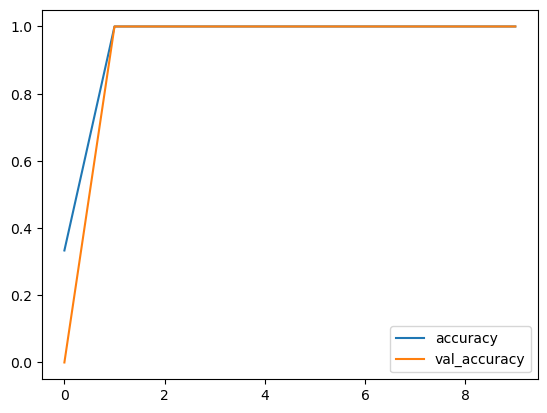

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

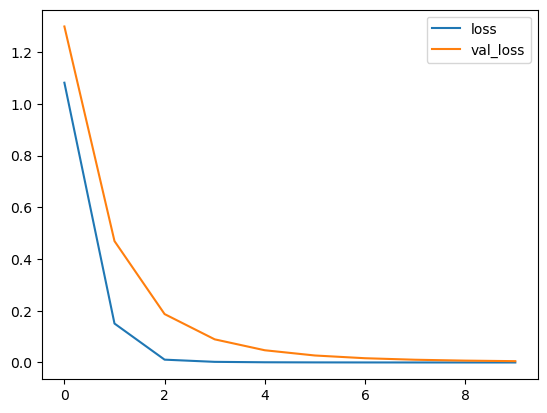

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [14]:
from keras import backend as K
import gc

K.clear_session()
gc.collect()

del model

#You need to install numba using 'pip install numba'

from numba import cuda

cuda.select_device(0)
cuda.close()